<a href="https://colab.research.google.com/github/Castillo-jacqueline/Metodos-numericos-/blob/main/Interpolante_Newton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:

# Utilizamos los datos de la tabla
x_data = np.array([0, 1, 2, 3, 4, 5])
y_data = np.array([-5, 1, 9, 25, 55, 105])

# Definimos la función
def diferencias_divididas(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:, 0] = y  # Primera columna es y

# Hacemos el calculo de las diferencias divididas
    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i + 1][j - 1] - coef[i][j - 1]) / (x[i + j] - x[i])
# Retorna solo la primera fila (los coeficientes del polinomio)
    return coef[0, :]
# Definimos la función para evaluar el polinomio de Newton en un valor dado de x
def evaluar_polinomio(coef, x_data, x):
    n = len(coef)
    polinomio = coef[0]
    for i in range(1, n):
        termino = coef[i]
        for j in range(i):
            termino *= (x - x_data[j])
        polinomio += termino
    return polinomio

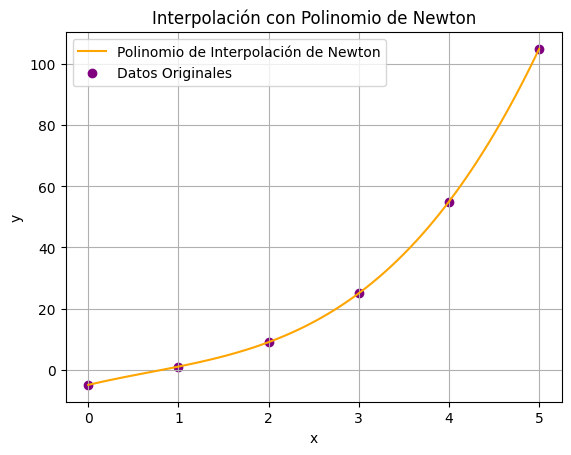

El valor aproximado de F(7.04) es 294.070464


In [23]:
# Obtener los coeficientes del polinomio interpolante
coeficientes = diferencias_divididas(x_data, y_data)

# Graficar el polinomio y los puntos de la tabla
x_vals = np.linspace(min(x_data), max(x_data), 100)
y_vals = [evaluar_polinomio(coeficientes, x_data, xi) for xi in x_vals]

plt.plot(x_vals, y_vals, label='Polinomio de Interpolación de Newton', color='orange')
plt.scatter(x_data, y_data, color='purple', label='Datos Originales')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Interpolación con Polinomio de Newton')
plt.grid()
plt.show()

# Evaluar el polinomio en un punto específico
x_evaluar = 7.04
y_evaluar = evaluar_polinomio(coeficientes, x_data, x_evaluar)
print(f"El valor aproximado de F({x_evaluar}) es {y_evaluar}")